In [27]:
import glob
import pandas
import numpy
import seaborn as sns

import os
from ftplib import FTP, error_perm

def ftpDownloader(stationId, startYear, endYear, url = 'ftp.pyclass.com', user = 'student@pyclass.com', passwd = 'student123'):
    ftp = FTP(url)
    ftp.login(user, passwd)
    if not os.path.exists('./Downloaded'):
        os.makedirs('./Downloaded')
    os.chdir('./Downloaded')
    
    for year in range(startYear, endYear + 1):
        fullpath = '/Data/%s/%s-%s.gz' % (year, stationId, year)
        filename = os.path.basename(fullpath)
        try:
            with open(filename, 'wb') as file:
                ftp.retrbinary('RETR %s' % fullpath, file.write)
                print('{} sucessfully downloaded'.format(filename))
        except error_perm:
            print("{} is not availabe".format(filename))
            os.remove(filename)
    
    ftp.close()

ids = ["010010-99999", "010014-99999", "010020-99999", "010030-99999"]

for name in ids:
    ftpDownloader(name, 1950, 2014)
    

def addField(indir = "/home/digger/Classes/Python/Data_Processing/S08_Data_Visualisation/Data/"):
    os.chdir(indir)
    fileList=glob.glob("*")
    print ("fileList" ,fileList)
    for filename in fileList:
        df=pandas.read_csv(filename,sep='\s+',header=None)
        df["Station"]=[filename.rsplit("-",1)[0]]*df.shape[0]
        df.to_csv(filename+".csv",index=None,header=None)
        os.remove(filename)

addField()

def concatenate(indir = "/home/digger/Classes/Python/Data_Processing/S08_Data_Visualisation/Data/",
                outfile = "/home/digger/Classes/Python/Data_Processing/S08_Data_Visualisation/Data/Concatenated.csv"):
    os.chdir(indir)
    fileList=glob.glob("*.csv")
    dfList=[]
    colnames=["Year","Month","Day","Hour","Temp","DewTemp","Pressure","WindDir","WindSpeed","Sky","Precip1","Precip6","ID"]
    for filename in fileList:
        print (filename)
        df=pandas.read_csv(filename,header=None)
        dfList.append(df)
    concatDf=pandas.concat(dfList,axis=0)    
    concatDf.columns=colnames
    concatDf.head()
    concatDf.to_csv(outfile,index=None)

concatenate()

In [20]:
def merge(left="/home/digger/Classes/Python/Data_Processing/S08_Data_Visualisation/Concatenated.csv",
          right="/home/digger/Classes/Python/Data_Processing/S08_Data_Visualisation/station-info.txt",
          output="/home/digger/Classes/Python/Data_Processing/S08_Data_Visualisation/Concatenated-Merged.csv"):
    
    leftDf=pandas.read_csv(left)   
    rightDf=pandas.read_fwf(right,converters={"USAF":str,"WBAN":str})
    rightDf["USAF_WBAN"]=rightDf["USAF"]+"-"+rightDf["WBAN"]
    
    mergedDf=pandas.merge(leftDf,rightDf.loc[:,["USAF_WBAN","STATION NAME","LAT","LON"]],left_on="ID",right_on="USAF_WBAN")
    mergedDf.to_csv(output)

In [21]:
merge()

In [23]:
def pivot(infile="Concatenated-Merged.csv",
          outfile="Pivoted.csv"):
    df=pandas.read_csv(infile)
    df=df.replace(-9999,numpy.nan)
    df['Temp']=df["Temp"]/10.0
    table=pandas.pivot_table(df,index=["ID"],columns="Year",values="Temp")
    table.to_csv(outfile)
    return table

In [25]:
df = pivot()

In [26]:
df 

Year,1955,1956,1957,1958,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ID,,,,,,,,,,,,,,,,,,,,,
010010-99999,-3.526534,0.431483,0.245773,0.24363,-2.310432,0.302257,-1.62386,-0.043223,-1.471797,-1.601049,...,0.648539,0.920238,0.391958,0.683287,0.795248,0.570720,0.980806,0.261968,-0.012554,2.041126
010014-99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.704609,9.898652,8.984462,10.290182,8.361894,7.074898,8.874160,8.429005,8.648713,10.031313
010020-99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.350000,-10.100000,4.366667,NaN,NaN,-11.022892,-5.853446,-3.552764,-6.165007,-4.946892
010030-99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.708975,-1.442147,-2.246325,-3.204857,-2.721445,-3.443499,-3.069504,-1.075459,-2.667349,-1.659599


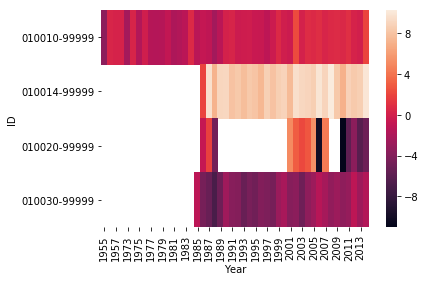

In [28]:
sns.heatmap(df)

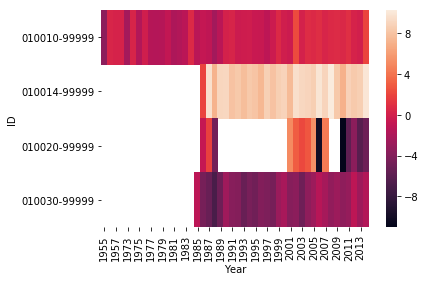

In [29]:
fig = sns.heatmap(df).get_figure()

In [30]:
fig.savefig("/home/digger/Classes/Python/Data_Processing/S08_Data_Visualisation/heatmap.png", dpi = 200)

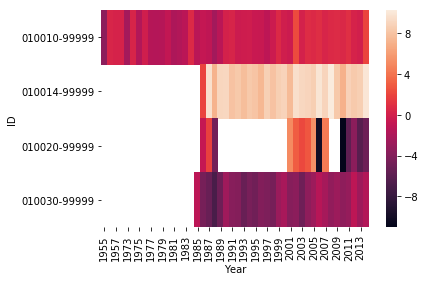

In [31]:
sns.heatmap(df, mask = df.isnull())

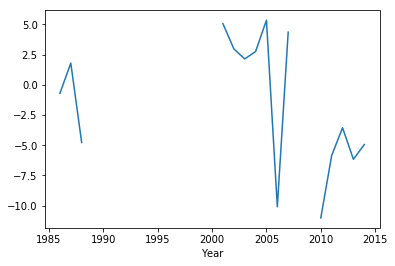

In [32]:
df.loc["010020-99999"].plot()

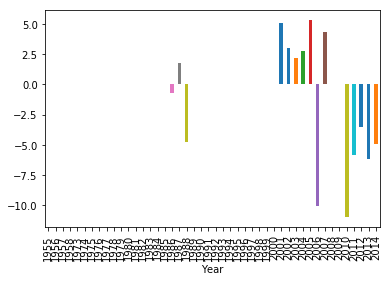

In [33]:
df.loc["010020-99999"].plot(kind = 'bar')

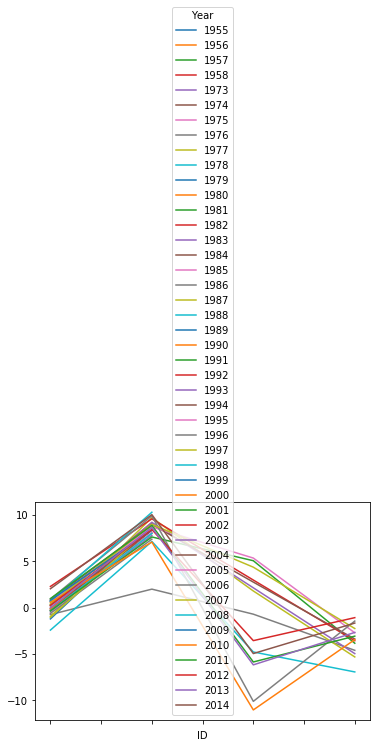

In [34]:
df.plot()

In [35]:
df.T

ID,010010-99999,010014-99999,010020-99999,010030-99999
Year,,,,
1955,-3.526534,NaN,NaN,NaN
1956,0.431483,NaN,NaN,NaN
1957,0.245773,NaN,NaN,NaN
1958,0.243630,NaN,NaN,NaN
1973,-2.310432,NaN,NaN,NaN
1974,0.302257,NaN,NaN,NaN
1975,-1.623860,NaN,NaN,NaN
1976,-0.043223,NaN,NaN,NaN
1977,-1.471797,NaN,NaN,NaN


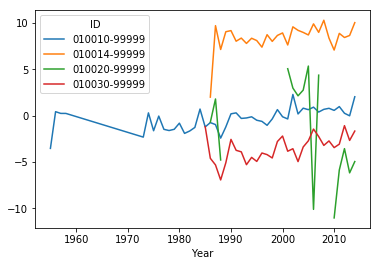

In [36]:
df.T.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f16e64af7f0>,
      dtype=object)

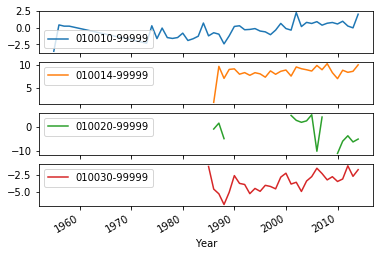

In [37]:
df.T.plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f16e6180320>,
      dtype=object)

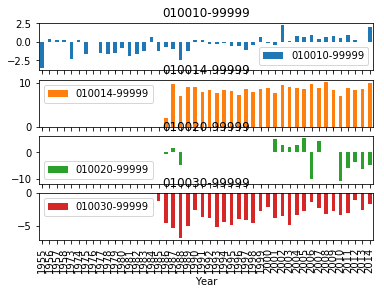

In [38]:
df.T.plot(subplots = True, kind = "bar")